# 🚀 Análise de Clima em Marte com a API da NASA (InSight Weather)
Este notebook explora dados meteorológicos reais coletados em Marte pela sonda InSight da NASA. A análise inclui:
- Extração de dados via API
- Limpeza e formatação dos dados
- Visualizações informativas sobre temperatura, pressão e ventos em Marte

**Fonte:** [NASA InSight Weather API](https://api.nasa.gov/)


In [24]:
# 🔧 Importando bibliotecas
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


In [ ]:
# 🔐 Inserindo sua chave da API
from dotenv import load_dotenv
load_dotenv()

API_KEY = os.getenv("NASA_API_KEY")

URL = f"https://api.nasa.gov/insight_weather/?api_key={API_KEY}&feedtype=json&ver=1.0"


In [26]:
# 🌐 Requisição dos dados
response = requests.get(URL)
data = response.json()

# Verificando as chaves disponíveis
print(data.keys())


dict_keys(['675', '676', '677', '678', '679', '680', '681', 'sol_keys', 'validity_checks'])


In [27]:
# 📦 Tratando os dados
sols = list(data.get('sol_keys', []))
mars_weather = []

for sol in sols:
    sol_data = data[sol]
    try:
        mars_weather.append({
            "sol": int(sol),
            "min_temp": sol_data['AT']['mn'],
            "max_temp": sol_data['AT']['mx'],
            "avg_temp": sol_data['AT']['av'],
            "wind_speed": sol_data['HWS']['av'],
            "pressure": sol_data['PRE']['av'],
            "season": sol_data['Season']
        })
    except KeyError:
        # Caso algum dado esteja ausente
        continue

df = pd.DataFrame(mars_weather)
df = df.astype({
    "min_temp": "float",
    "max_temp": "float",
    "avg_temp": "float",
    "wind_speed": "float",
    "pressure": "float"
})
df = df.sort_values("sol")
df.head()


,sol,min_temp,max_temp,avg_temp,wind_speed,pressure,season
0,675,-96.872,-15.908,-62.314,7.233,750.563,fall
1,676,-96.912,-16.499,-62.812,8.526,749.090,fall
2,677,-97.249,-16.853,-63.056,7.887,748.698,fall
3,678,-97.728,-9.055,-62.562,5.246,743.741,fall
4,679,-96.644,-11.561,-62.551,5.565,744.529,fall


## 📊 Visualizações dos Dados de Marte

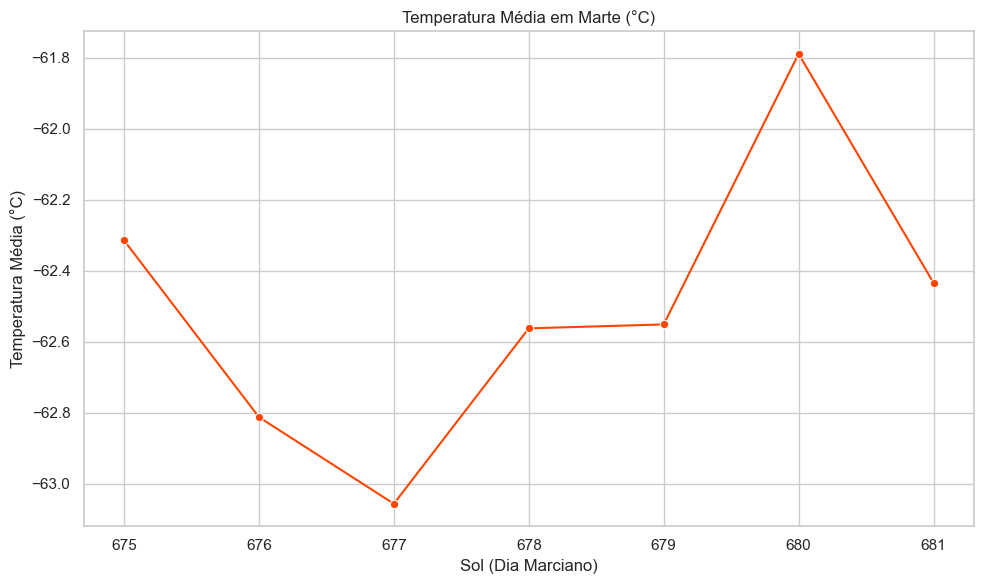

In [28]:
# 🌡️ 1. Temperatura Média por Sol
sns.lineplot(x="sol", y="avg_temp", data=df, marker="o", color="orangered")
plt.title("Temperatura Média em Marte (°C)")
plt.xlabel("Sol (Dia Marciano)")
plt.ylabel("Temperatura Média (°C)")
plt.tight_layout()
plt.show()


C:\Users\evert\AppData\Local\Temp\ipykernel_6032\3339525391.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="sol", y="pressure", data=df, palette="Blues_d")


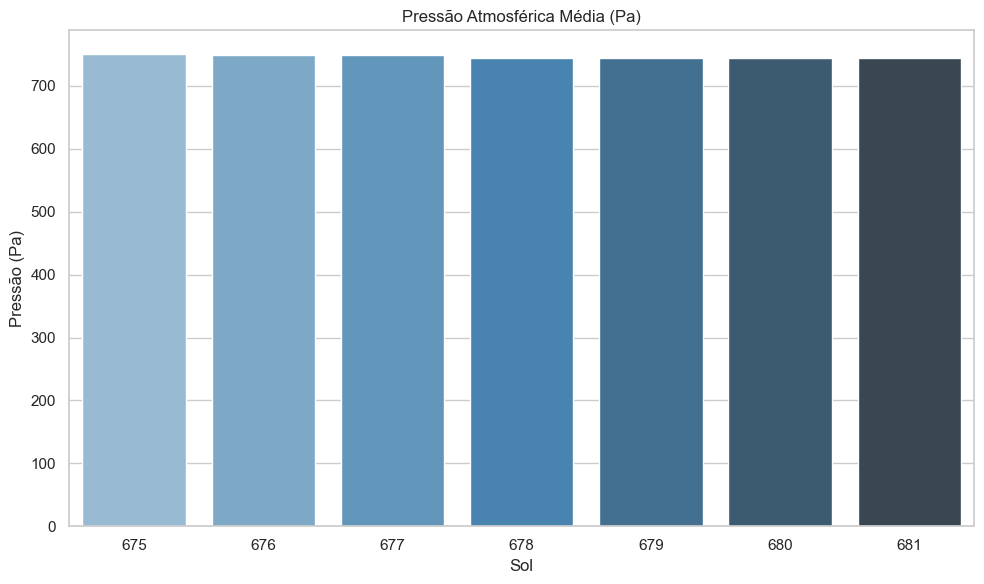

In [29]:
# 🌬️ 2. Pressão Atmosférica por Sol
sns.barplot(x="sol", y="pressure", data=df, palette="Blues_d")
plt.title("Pressão Atmosférica Média (Pa)")
plt.xlabel("Sol")
plt.ylabel("Pressão (Pa)")
plt.tight_layout()
plt.show()


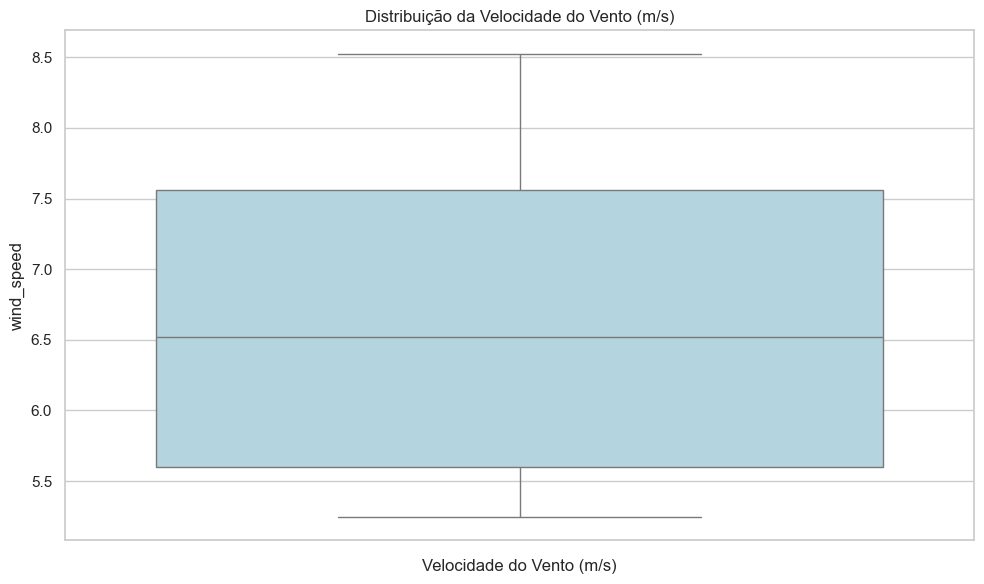

In [30]:
# 💨 3. Distribuição da Velocidade do Vento
sns.boxplot(data=df["wind_speed"], color="lightblue")
plt.title("Distribuição da Velocidade do Vento (m/s)")
plt.xlabel("Velocidade do Vento (m/s)")
plt.tight_layout()
plt.show()


## 📌 Conclusões
- A temperatura média em Marte é extremamente baixa, com variações entre -63°C e -62°C nos últimos sols registrados.
- A pressão atmosférica permanece consistentemente baixa, como esperado para o ambiente marciano.
- A velocidade do vento varia, mas geralmente está entre 5–8 m/s.

Essas informações são cruciais para planejamento de missões e exploração futura do planeta vermelho.
